<a href="https://colab.research.google.com/github/Dhanalaxmi3103/Data_Science_Workshop/blob/main/Salary_Prediction_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SALARY PREDICTION**

*IMPORTING NECESSARY LIBRARIES*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

*LOADING THE DATASET*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salary_prediction_data.csv to salary_prediction_data.csv


In [ ]:
sal_predict= pd.read_csv('/content/salary_prediction_data.csv')
sal_predict.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


# *EXPLORATORY DATA ANALYSIS*

In [ ]:
sal_predict.dtypes

,0
Education,object
Experience,int64
Location,object
Job_Title,object
Age,int64
Gender,object
Salary,float64


In [ ]:
sal_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [ ]:
sal_predict.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [ ]:
#checking null values
sal_predict.isnull().sum()

,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,0
Gender,0
Salary,0


# Visualization

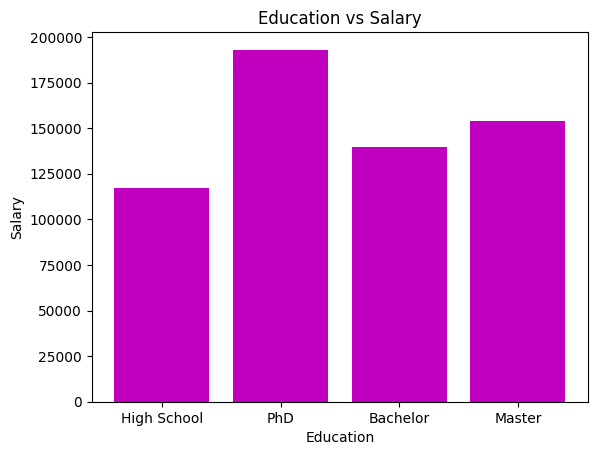

In [ ]:
#ploting Education vs Salary
plt.bar(sal_predict['Education'],sal_predict['Salary'],color='m')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.title('Education vs Salary')
plt.show()

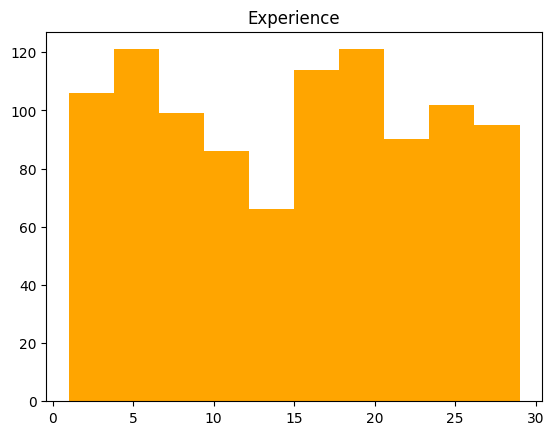

In [ ]:
plt.hist(sal_predict['Experience'],color='orange')
plt.title('Experience')
plt.show()

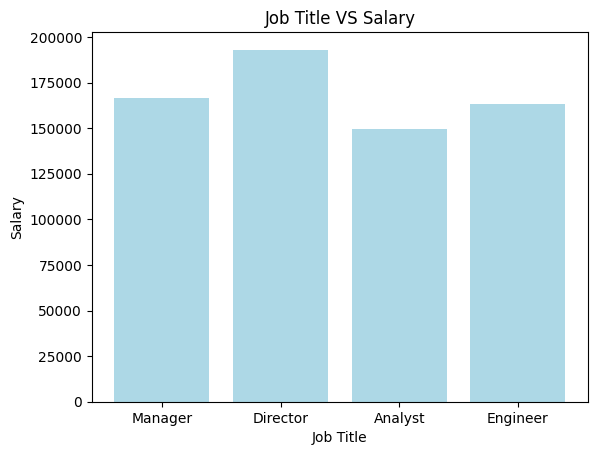

In [ ]:
#Plotting between Job Title and Salary Distribution
plt.bar(sal_predict['Job_Title'],sal_predict['Salary'],color='lightblue')
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.title("Job Title VS Salary")
plt.show()

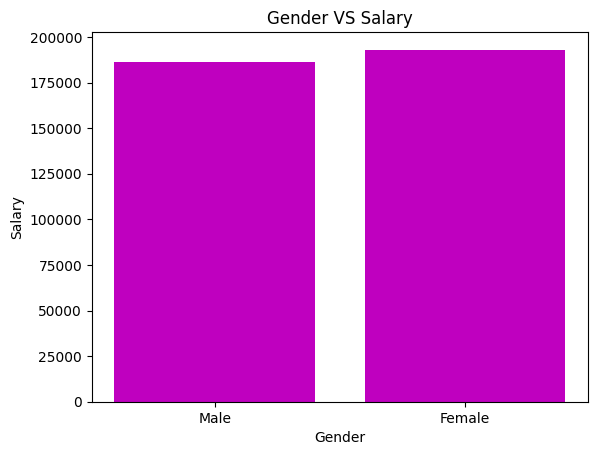

In [ ]:
#plotting Gender vs Salary distribution
plt.bar(sal_predict['Gender'],sal_predict['Salary'],color='m')
plt.xlabel('Gender')
plt.ylabel("Salary")
plt.title("Gender VS Salary")
plt.show()

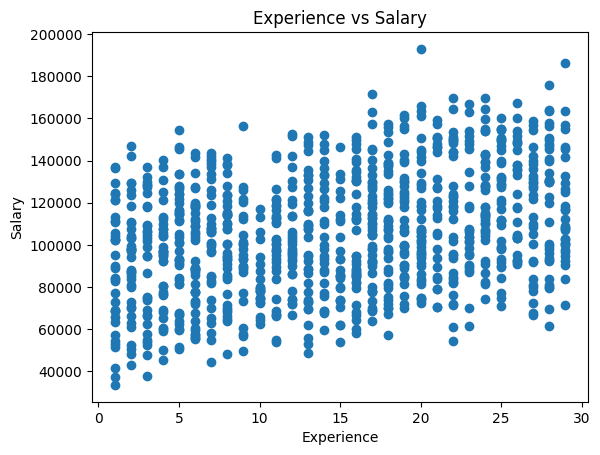

In [ ]:
#Relationship between Experience and Salary
plt.scatter(sal_predict['Experience'],sal_predict['Salary'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()

#Model fitting using two independent features

**Encoding**

In [ ]:
sal_predict['Education'].unique()

array(['High School', 'PhD', 'Bachelor', 'Master'], dtype=object)

The unique() funnction is applied to Education column to know the unique value.By knowing unique values we can easily encode Education column.

In [ ]:
#Encoding education level
sal_predict['Education_Encoded'] = sal_predict['Education'].map({'High School':0,'Bachelor':1,'Master':2,'PhD':3})
sal_predict.head()


,Education,Experience,Location,Job_Title,Age,Gender,Salary,Education_Encoded
0,High School,8,Urban,Manager,63,Male,84620.053665,0
1,PhD,11,Suburban,Director,59,Male,142591.255894,3
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404,1
3,High School,29,Rural,Director,45,Male,96834.671282,0
4,PhD,25,Urban,Analyst,26,Female,132157.786175,3


The map() function is applied to the Education column, where each category (e.g., "High School") is replaced with its corresponding encoded value (e.g., 0).

The new encoded values are stored in a new column, Education_Encoded.



Encoding involves transforming raw, unstructured, or categorical data into a numerical format that the model can understand. This process ensures that the model can effectively learn patterns and make predictions based on the data.
Linear Regression designed to work with numerical data,which rely on mathematical operations like addition, multiplication, and averaging, which only make sense when data is represented numerically.

Linear Regression rely on numeric values and can’t handle categorical data.


**Setting features for independent and dependent variales**

In [ ]:
sal_predict_X=sal_predict[['Experience','Education_Encoded']]
sal_predict_y=sal_predict['Salary']

**Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(sal_predict_X,sal_predict_y,test_size=0.3,random_state=10)

**Fitting the MultiLinear Model**

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Finding Intercept and Coefficients**

In [ ]:
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 60884.545036227224
Coefficients: [ 1058.71866666 19509.3072377 ]


In [ ]:
list(zip(sal_predict_X,model.coef_))

[('Experience', 1058.7186666567795), ('Education_Encoded', 19509.30723769826)]

**Regression equation=60884.545+(1058.718*Experience)+(19509.307*Education_Encoded)**

**Salary prediction using test data**

In [ ]:
salary_predicted=model.predict(X_test)
print(salary_predicted)

[ 89922.32027384  87352.51170265 105803.10027369 121077.53284476
 120018.8141781   89469.94903596 137410.68408249  90981.03894049
 100961.87817828 123647.34141595 149056.58941571  82511.28960724
 111549.06484485 135293.24674917 132117.0907492   63001.98236954
 122136.25151142  65119.41970285  78882.76236939 112607.78351151
  86746.16427387  71471.7317028   66178.13836951  61943.26370288
  84176.35570268  65119.41970285 146939.1520824  139528.1214158
 114725.22084482  90528.66770262  90528.66770262 124253.68884473
  84628.72694055 135293.24674917 137410.68408249  82511.28960724
 125764.77874926 120018.8141781   91587.38636927  90981.03894049
 118960.09551145 100509.5069404   63001.98236954 108979.25627366
 141645.55874911  72530.45036945  73589.16903611  98392.06960709
 150115.30808237 102626.94427372  81452.57094058 136351.96541583
 124706.06008261 133175.80941586 114725.22084482 142704.27741577
  76765.32503608  97333.35094043 134234.52808252 139528.1214158
 111096.69360697 122136.251

In [ ]:
salary_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': salary_predicted})
salary_diff.head()

,Actual value,Predicted value
841,95126.807854,89922.320274
956,117061.246218,87352.511703
544,117826.576534,105803.100274
173,143982.406224,121077.532845
759,118085.622688,120018.814178


**Evaluating the model**

In [ ]:
#Model Evaluation
from sklearn import metrics
print('R squared: {:.2f}'.format(model.score(X_test,y_test)*100))


R squared: 74.75


In [ ]:
#Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, salary_predicted)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 11988.118065757124


In [ ]:
#Mean Squared Error
mse = metrics.mean_squared_error(y_test, salary_predicted)
print('Mean Square Error:', mse)


Mean Square Error: 215735421.79328364


In [ ]:
#Root Mean Squared Error
rmse = np.sqrt(metrics.mean_squared_error(y_test, salary_predicted))
print('Root Mean Square Error:', rmse)


Root Mean Square Error: 14687.93456525742


Model Performance  is 73.18 ,means the model is not predicting the Salary Acurately.
Using only Experience and Education we are not getting accurate results for Salary Prediction.

So we need to add more independent featurs

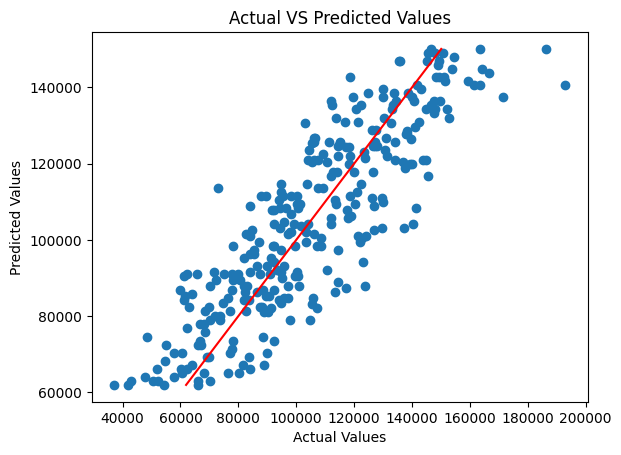

In [ ]:
plt.scatter(y_test,salary_predicted)
plt.plot([min(salary_predicted),max(salary_predicted)],[min(salary_predicted),max(salary_predicted)],color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual VS Predicted Values")
plt.show()

# Model Fitting Using More Independent Features

**Encoding**

In [ ]:
#Identifying Unique Locations
sal_predict['Location'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [ ]:
#Encoding Location
sal_predict['Location_Encoded']=sal_predict['Location'].map({'Urban':0,'Suburban':1,'Rural':2})
sal_predict.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary,Education_Encoded,Location_Encoded
0,High School,8,Urban,Manager,63,Male,84620.053665,0,0
1,PhD,11,Suburban,Director,59,Male,142591.255894,3,1
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404,1,1
3,High School,29,Rural,Director,45,Male,96834.671282,0,2
4,PhD,25,Urban,Analyst,26,Female,132157.786175,3,0


In [ ]:
#Identifying Unique Job Title
sal_predict['Job_Title'].unique()

array(['Manager', 'Director', 'Analyst', 'Engineer'], dtype=object)

In [ ]:
#Encoding Job Title
sal_predict['Job_Encoded']=sal_predict['Job_Title'].map({'Analyst':0,'Director':1,'Engineer':2,'Manager':3,})
sal_predict.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary,Education_Encoded,Location_Encoded,Job_Encoded
0,High School,8,Urban,Manager,63,Male,84620.053665,0,0,3
1,PhD,11,Suburban,Director,59,Male,142591.255894,3,1,1
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404,1,1,3
3,High School,29,Rural,Director,45,Male,96834.671282,0,2,1
4,PhD,25,Urban,Analyst,26,Female,132157.786175,3,0,0


**Setting Features for Independent and Dependent variables**

In [ ]:
salary_x=sal_predict[['Education_Encoded','Experience','Location_Encoded','Job_Encoded']]
salary_y=sal_predict['Salary']

**Splitting the Dataset**

In [ ]:

X_Train,X_Test,y_Train,y_test=train_test_split(salary_x,salary_y,test_size=0.3,random_state=0)

**Fitting Model**

In [ ]:
model1=LinearRegression()
model1.fit(X_Train,y_Train)

LinearRegression()

**Finding Intercept and Coefficients**


In [ ]:
print("Intercept:",model1.intercept_)
list(zip(salary_x,model1.coef_))

Intercept: 61434.87928668319


[('Education_Encoded', 19514.83645893834),
 ('Experience', 1053.1455882129133),
 ('Location_Encoded', -4671.564436047804),
 ('Job_Encoded', 3050.0619150644443)]

**Predicting Salary using Test Data**

In [ ]:
sal_predicted=model1.predict(X_Test,)
sal_predicted

array([ 88707.28973064, 130787.02456359, 148789.73335112,  79145.4111594 ,
       125052.17347766,  96746.89956882,  83431.42072792, 143414.63056048,
       134395.30234976, 104384.9576426 , 156511.35970223, 102596.64995323,
       127168.60571575,  78285.20869809, 110244.84908868,  75016.39708388,
       128295.17851963, 109749.91937157, 106215.06880107,  74907.0222343 ,
        64594.31605132, 143148.59160418, 127617.44673728, 103999.40277507,
        95610.18570327,  97122.31337468,  78978.60599102, 123055.25715081,
       129833.11276328, 129942.48761286, 108331.50103916, 125729.90526001,
        70803.81473103, 123899.79410154,  73712.87804995, 102706.02480281,
       113128.10583536,  80282.12502494,  66507.66410085, 105730.28014562,
        82138.04275566,  92810.49723392, 133451.53161112, 156620.7345518 ,
       134858.6083203 , 102012.62750988, 107268.21438928, 123623.61408358,
       112742.55096783,  82763.83000724, 135583.62935979,  88029.5579483 ,
       106215.06880107, 1

In [ ]:
sal_predict_diff=pd.DataFrame({'Actual Values':y_test,'Predicted Values':sal_predicted})
sal_predict_diff.head()

,Actual Values,Predicted Values
993,98276.767603,88707.289731
859,117342.186715,130787.024564
298,135962.905626,148789.733351
553,92184.829258,79145.411159
672,133712.642696,125052.173478


**Evaluating Model Performance**

In [ ]:
print('R squared: {:.2f}'.format(model1.score(X_Test,y_test)*100))

R squared: 77.85


In [ ]:
#Meam Squared Error
mse=metrics.mean_squared_error(y_test,sal_predicted)
print("Mean Squared Error:",mse)

Mean Squared Error: 188068916.5702183


In [ ]:
#Mean Absoulte Error
mae=metrics.mean_absolute_error(y_test,sal_predicted)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 11437.98611313081


In [ ]:
#Root Mean Squared Error
rmse=np.sqrt(metrics.mean_squared_error(y_test,sal_predicted))
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 13713.82209926242


Model Performance:77.85

Model Performance is high in model with more independent variables when comparing with the model with only two independent variables(74.75)

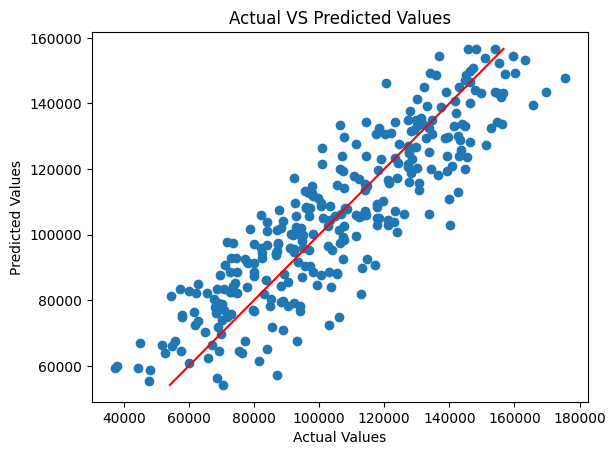

In [ ]:
plt.scatter(y_test,sal_predicted)
plt.plot([min(sal_predicted),max(sal_predicted)],[min(sal_predicted),max(sal_predicted)],color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual VS Predicted Values")
plt.show()